# Lung Cancer Classification using Computerized Tomography (CT) Data

### Abstract

Lung cancer is one of the leading causes of cancer-related deaths worldwide, largely due to late diagnosis when treatment options are limited. Early detection is critical, as it significantly improves the chances of successful treatment and survival. Computed Tomography (CT) scans play a crucial role in the early diagnosis of lung cancer, providing detailed images of the lungs that allow for the identification of abnormal growths at an early stage. 
The integration of Machine Learning (ML) algorithms with CT data has further enhanced diagnostic accuracy by enabling automated classification of suspicious nodules, helping radiologists detect lung cancer more efficiently and with greater precision.

### Business Understanding

1. Project Objective:

- The primary objective of this project is to develop a machine learning model that can assist in identifying malignant lung nodules based on CT scan data. By effectively distinguishing between benign and malignant cases, the model aims to support medical professionals in diagnostic decision-making, allowing for quicker and more reliable identification of potentially cancerous nodules. 


2. Business Need and Impact:

- Lung cancer remains one of the leading causes of cancer-related mortality worldwide, partly due to late diagnoses that limit treatment options. Detecting malignancies at an early stage can greatly improve patient outcomes, and leveraging AI to assist radiologists and clinicians has the potential to enhance diagnostic accuracy and efficiency. By integrating an AI-driven model into the diagnostic process, healthcare providers can make data-informed decisions, prioritize cases requiring immediate attention, and ultimately improve patient care and survival rates.


3. Success Criteria: To achieve a meaningful impact, the project is guided by the following success criteria:

- Sensitivity: Ensuring the model has high sensitivity (recall) to minimize the risk of missing malignant cases.

- Balanced Model Performance: Striking a balance between sensitivity and specificity to avoid a high number of false positives, which could burden clinical workflows.

- Interpretability: We enhance interpretability by implementing diverse metrics—Accuracy, AUC, Sensitivity, and Specificity—to provide clinicians with clear insights into the model’s decisions, supporting trust in its recommendations.


4. Stakeholders and End Users

- The primary stakeholders for this project include radiologists, oncologists, and other healthcare providers involved in lung cancer diagnosis and treatment. By providing an efficient, supportive diagnostic tool, the model can assist radiologists in reducing diagnostic time, improving patient outcomes, and optimizing resource allocation in clinical settings.

### Data Understanding

For this project, we used the LIDC-IDRI dataset (Lung Image Database Consortium and Image Database Resource Initiative), one of the most comprehensive public datasets for lung cancer research. Developed by the National Cancer Institute and other collaborators, it includes CT scans of over 1,000 patients aimed at supporting early lung cancer diagnosis through machine learning.

Key Features of the LIDC-IDRI Dataset:

- CT Scan Images: High-resolution 3D images focused on lung structures, ideal for nodule detection.
- Radiologist Annotations: Four radiologists labeled nodules, noting characteristics like size, margin, and malignancy potential.
- Detailed and Consistent Labels: Multi-expert consensus ensures high-quality, consistent annotations.

The LIDC-IDRI dataset is crucial for developing models for early lung cancer detection, providing a rich source of data to train and evaluate predictive models for potential malignancy detection.

### Import Statements

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_predict, StratifiedKFold
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, make_scorer,fbeta_score
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from scipy.stats import ttest_ind
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from scipy.stats import zscore

### Data Pre-Processing

In [4]:
df = pd.read_csv('lung_cancer.csv')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 5)
df

Patient_ID    Nodule_ID  subtlety  internalStructure  sphericity  \
0     LIDC-IDRI-0078     Nodule_1         4                  1           4   
1     LIDC-IDRI-0078     Nodule_2         5                  1           4   
...              ...          ...       ...                ...         ...   
2649  LIDC-IDRI-0638  Nodule_2650         5                  1           4   
2650  LIDC-IDRI-0127  Nodule_2651         5                  1           5   

      margin  lobulation  spiculation  texture  malignancy         0  \
0          4           2            2        5        3.75  0.485212   
1          2           4            1        5        3.75  0.476340   
...      ...         ...          ...      ...         ...       ...   
2649       5           1            1        5        2.00  0.539032   
2650       5           4            5        5        2.50  0.478903   

             1    2         3    4         5         6         7    8  \
0     5.631437  0.0  1.381731  0.0  0.000000  1.228144  0.000000  0.0   
1     5.468267  0.0  1.381731  0.0  0.000000  0.930119  0.000000  0.0   
...        ...  ...       ...  ...       ...       ...       ...  ...   
2649  6.079885  0.0  1.381731  0.0  0.000000  1.188471  0.000000  0.0   
2650  6.305272  0.0  1.340455  0.0  0.878463  2.872866  1.544017  0.0   

             9        10   11        12   13        14       15   16   17  \
0     4.972776  0.120430  0.0  3.296780  0.0  1.937186  0.07989  0.0  0.0   
1     4.856986  0.185875  0.0  3.729870  0.0  1.937186  0.07989  0.0  0.0   
...        ...       ...  ...       ...  ...       ...      ...  ...  ...   
2649  5.017223  0.352149  0.0  3.366145  0.0  1.937186  0.34645  0.0  0.0   
2650  5.287624  1.572841  0.0  4.276811  0.0  1.932495  0.03272  0.0  0.0   

       18   19        20   21        22        23        24        25   26  \
0     0.0  0.0  1.912235  0.0  5.784955  2.379365  2.340594  1.350695  0.0   
1     0.0  0.0  1.912235  0.0  5.868021  2.351885  2.285178  1.593627  0.0   
...   ...  ...       ...  ...       ...       ...       ...       ...  ...   
2649  0.0  0.0  1.912235  0.0  6.038005  2.697444  2.385331  1.655472  0.0   
2650  0.0  0.0  1.954039  0.0  5.739590  2.306049  2.261628  2.081676  0.0   

            27   28   29        30        31   32        33   34   35   36  \
0     0.067213  0.0  0.0  4.026655  0.000000  0.0  1.430935  0.0  0.0  0.0   
1     0.149934  0.0  0.0  4.076985  0.000000  0.0  1.164907  0.0  0.0  0.0   
...        ...  ...  ...       ...       ...  ...       ...  ...  ...  ...   
2649  0.194002  0.0  0.0  4.201760  0.000000  0.0  1.034024  0.0  0.0  0.0   
2650  0.106216  0.0  0.0  4.213830  0.244743  0.0  1.954809  0.0  0.0  0.0   

            37        38        39   40        41        42   43        44  \
0     5.179124  2.716117  1.809509  0.0  2.022111  4.173106  0.0  4.682200   
1     5.245728  2.716117  1.744404  0.0  1.980579  4.323721  0.0  4.689307   
...        ...       ...       ...  ...       ...       ...  ...       ...   
2649  5.198395  2.716117  1.581395  0.0  2.513406  4.231794  0.0  4.874316   
2650  5.282460  2.687582  2.485293  0.0  1.981566  4.197150  0.0  4.733205   

            45        46        47   48   49        50   51        52   53  \
0     0.890579  4.978999  4.364854  0.0  0.0  0.148295  0.0  0.000000  0.0   
1     1.259818  4.978999  4.255892  0.0  0.0  0.534951  0.0  0.000000  0.0   
...        ...       ...       ...  ...  ...       ...  ...       ...  ...   
2649  0.751392  4.978999  4.632677  0.0  0.0  0.526735  0.0  0.000000  0.0   
2650  2.433374  4.891709  4.288112  0.0  0.0  1.373872  0.0  0.065671  0.0   

       54        55        56   57        58        59        60        61  \
0     0.0  0.957169  1.203684  0.0  2.967718  1.597689  0.299812  0.000000   
1     0.0  0.494838  1.051683  0.0  2.967718  1.816055  0.261041  0.000000   
...   ...       ...       ...  ...       ...       ...       ...       ...   
2649  0.0  1.16452

It is fundamental to check if there are any missing values

In [5]:
df.isna().sum()

Patient_ID             0
Nodule_ID              0
                      ..
encoded_feature_254    0
encoded_feature_255    0
Length: 18698, dtype: int64

Also, attributes that are unique do not represent an advantage for our model

In [6]:
df.nunique().tolist()
unique_value_counts = df.nunique()
columns_with_single_unique_value = unique_value_counts[unique_value_counts == 1].index
df.drop(columns=columns_with_single_unique_value,inplace=True)

According to Causey et al. (2018), malignancy rating assigned should be the average of the malignancy ratings assigned by the radiologists
who annotated the nodule, rounded to the nearest integer.

In [7]:
df['malignancy'] = df['malignancy'].round().astype(int)

In [8]:
df = df.iloc[:, 2:]


In our study, we chose to use a dataset categorized with composite malignancy ratings of 1, 2 vs 4, 5, following the work by  Xie et al (2018). His research compared different rating splits, including 1, 2, 3 vs 4, 5, as well as 1, 2 vs 3, 4, 5. His findings showed that the 1, 2 versus 4, 5 grouping provided better discrimination between benign and malignant cases, resulting in improved model performance and more reliable predictions. This approach reduces ambiguity associated with intermediate rating values, ensuring clearer classification boundaries.

In [9]:
df = df[df['malignancy'] != 3]
df['malignancy'] = df['malignancy'].replace({1: 0, 2: 0, 4: 1, 5: 1})

As we know from Causey et al. (2018) work, it is fundamental to check if both classes are balanced. 

This balance reduces the risk of the model missing cancerous nodules (false negatives), providing a fairer and more sensitive model that can better distinguish between benign and malignant cases—crucial for early and reliable lung cancer detection.

In [10]:
df["malignancy"].value_counts()

malignancy
0    1123
1     502
Name: count, dtype: int64

As shown above, the labels are not balanced, so we are going to use oversampling to address this. Following the methodology used by Dunn, Pierobon, and Wei (2023), we applied the synthetic minority over-sampling technique (SMOTE) to handle class imbalance in our dataset.

In [11]:
smote = SMOTE(sampling_strategy='auto', random_state=42)
df, _ = smote.fit_resample(df, df['malignancy'])
df["malignancy"].value_counts()

malignancy
1    1123
0    1123
Name: count, dtype: int64

In [14]:
# Data
metrics = ['AUC', 'Sensitivity', 'Specificity']
rf_before = [0.924, 0.777, 0.923]  
rf_after = [0.961, 0.915, 0.893]   
svm_before = [0.877, 0.793, 0.867] 
svm_after = [0.947, 0.939, 0.86]  

# Position for each metric on the x-axis
x = np.arange(len(metrics))

# Bar width
width = 0.15

# Plotting
fig, ax = plt.subplots(figsize=(12, 8))

# Creating bars with enhanced clarity
bars1 = ax.bar(x - 1.5 * width, rf_before, width, label='RF Before SMOTE', color='skyblue', edgecolor='black')
bars2 = ax.bar(x - 0.5 * width, rf_after, width, label='RF After SMOTE', color='dodgerblue', edgecolor='black')
bars3 = ax.bar(x + 0.5 * width, svm_before, width, label='SVM Before SMOTE', color='lightgreen', edgecolor='black')
bars4 = ax.bar(x + 1.5 * width, svm_after, width, label='SVM After SMOTE', color='green', edgecolor='black')

# Adding labels and title
ax.set_xlabel('Metrics', fontsize=14)
ax.set_ylabel('Scores', fontsize=14)
ax.set_title('Comparison of RF and SVM Before and After SMOTE', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(metrics, fontsize=12)
ax.legend()

# Adding data labels on each bar for clarity
for bars in [bars1, bars2, bars3, bars4]:
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, yval + 0.01, f"{yval:.3f}", ha="center", va="bottom", fontsize=10)

plt.show()


As shown in the graph, we identified the practical challenge of unbalanced data in our classification task and demonstrated that an oversampling approach, specifically SMOTE (Synthetic Minority Oversampling Technique), did in fact improve the accuracy of malignancy classification, particularly enhancing sensitivity.

As we know from Lapedes & Farber (1987), Neural networks tend to work better with values in a lower range. 

So, we rescaled the values into a range of [0,1] using Min-Max Scaling.

In [15]:
scaler = MinMaxScaler()

columns_to_scale = df.columns.difference(['malignancy'])
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])
df

subtlety  internalStructure  sphericity  margin  lobulation  \
0         0.75                0.0        0.75    0.75        0.25   
1         1.00                0.0        0.75    0.25        0.75   
...        ...                ...         ...     ...         ...   
2244      0.75                0.0        0.75    1.00        0.00   
2245      0.50                0.0        0.50    1.00        0.00   

      spiculation  texture  malignancy         0         1    2         3  \
0            0.25      1.0           1  0.154890  0.390117  0.0  0.067690   
1            0.00      1.0           1  0.152058  0.349911  0.0  0.067690   
...           ...      ...         ...       ...       ...  ...       ...   
2244         0.00      1.0           1  0.152058  0.557048  0.0  0.116963   
2245         0.00      1.0           1  0.157020  0.495457  0.0  0.070007   

             5         6    7    8         9        10   11        12   13  \
0     0.000000  0.110590  0.0  0.0  0.487233  0.022751  0.0  0.052252  0.0   
1     0.000000  0.060910  0.0  0.0  0.444724  0.035115  0.0  0.183666  0.0   
...        ...       ...  ...  ...       ...       ...  ...       ...  ...   
2244  0.198098  0.264178  0.0  0.0  0.455439  0.140259  0.0  0.232006  0.0   
2245  0.011261  0.161531  0.0  0.0  0.414976  0.098659  0.0  0.072727  0.0   

            14        15   16   17   18   19        20   21        22  \
0     0.199771  0.048562  0.0  0.0  0.0  0.0  0.310363  0.0  0.425664   
1     0.199771  0.048562  0.0  0.0  0.0  0.0  0.310363  0.0  0.450099   
...        ...       ...  ...  ...  ...  ...       ...  ...       ...   
2244  0.199771  0.048562  0.0  0.0  0.0  0.0  0.310363  0.0  0.556054   
2245  0.199771  0.093333  0.0  0.0  0.0  0.0  0.318849  0.0  0.528503   

            23        24        25   26        27   28   29        30   31  \
0     0.466607  0.709148  0.280250  0.0  0.012748  0.0  0.0  0.646142  0.0   
1     0.458038  0.686733  0.330892  0.0  0.036560  0.0  0.0  0.660808  0.0   
...        ...       ...       ...  ...       ...  ...  ...       ...  ...   
2244  0.490691  0.649211  0.371529  0.0  0.124205  0.0  0.0  0.756081  0.0   
2245  0.458038  0.783935  0.353773  0.0  0.025688  0.0  0.0  0.749108  0.0   

       32        33   34   35   36        37        38        39   40  \
0     0.0  0.142956  0.0  0.0  0.0  0.531804  0.875237  0.045575  0.0   
1     0.0  0.081066  0.0  0.0  0.0  0.552432  0.875237  0.038149  0.0   
...   ...       ...  ...  ...  ...       ...       ...       ...  ...   
2244  0.0  0.185564  0.0  0.0  0.0  0.523688  0.875237  0.048346  0.0   
2245  0.0  0.104373  0.0  0.0  0.0  0.522537  0.875237  0.014723  0.0   

            41        42   43        44        45        46        47   48  \
0     0.556637  0.803407  0.0  0.174125  0.073500  0.988546  0.346033  0.0   
1     0.545204  0.832404  0.0  0.179074  0.125355  0.988546  0.317837  0.0   
...        ...       ...  ...       ...       ...       ...       ...  ...   
2244  0.599831  0.817619  0.0  0.275743  0.143170  0.988546  0.413440  0.0   
2245  0.645553  0.824106  0.0  0.394759  0.083904  0.988546  0.456163  0.0   

       49        50   51   52   53   54        55        56   57        58  \
0     0.0  0.030190  0.0  0.0  0.0  0.0  0.103629  0.054261  0.0  0.475982   
1     0.0  0.108905  0.0  0.0  0.0  0.0  0.032513  0.040961  0.0  0.475982   
...   ...       ...  ...  ...  ...  ...       ...       ...  ...       ...   
2244  0.0  0.188880  0.0  0.0  0.0  0.0  0.310433  0.074800  0.0  0.475982   
2245  0.0  0.199536  0.0  0.0  0.0  0.0  0.174286  0.036356  0.0  0.475982   

            59        60       61   62        63        64   65        66  \
0     0.058396  0.028550  0.00000  0.0  0.000000  0.591214  0.0  0.248096   
1     0.088765  0.024858  0.00000  0.0  0.000000  0.773030  0.0  0.153747   
...        ...       ...      ...  ...       ...       ...  ...       ...   
2244  0.085994  0.076390  0.01041  0.0  0.000000  0.695619  0.0  0

In [16]:
df = df[[col for col in df if col != 'malignancy'] + ['malignancy']]


### Exploratory Data Analysis (EDA)

In [12]:
annotations_columns = [
    'subtlety',
    'internalStructure',
    'sphericity',
    'margin',
    'lobulation',
    'spiculation',
    'texture'
]

# Summary statistics for annotations features
shape_summary = df[annotations_columns].describe()
print(shape_summary)

# Correlation analysis for annotations features
shape_correlation_matrix = df[annotations_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(shape_correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix for Annotations Features")
plt.show()

          subtlety  internalStructure   sphericity       margin   lobulation  \
count  2246.000000        2246.000000  2246.000000  2246.000000  2246.000000   
mean      0.731634           0.001633     0.655276     0.714381     0.170191   
...            ...                ...          ...          ...          ...   
75%       1.000000           0.000000     0.750000     1.000000     0.250000   
max       1.000000           1.000000     1.000000     1.000000     1.000000   

       spiculation      texture  
count  2246.000000  2246.000000  
mean      0.142809     0.867765  
...            ...          ...  
75%       0.250000     1.000000  
max       1.000000     1.000000  

[8 rows x 7 columns]


In [ ]:
outliers = (np.abs(zscore(df)) > 3).sum(axis=0)  
print(outliers)

subtlety                0
internalStructure       6
                       ..
encoded_feature_255    14
malignancy              0
Length: 7106, dtype: int64


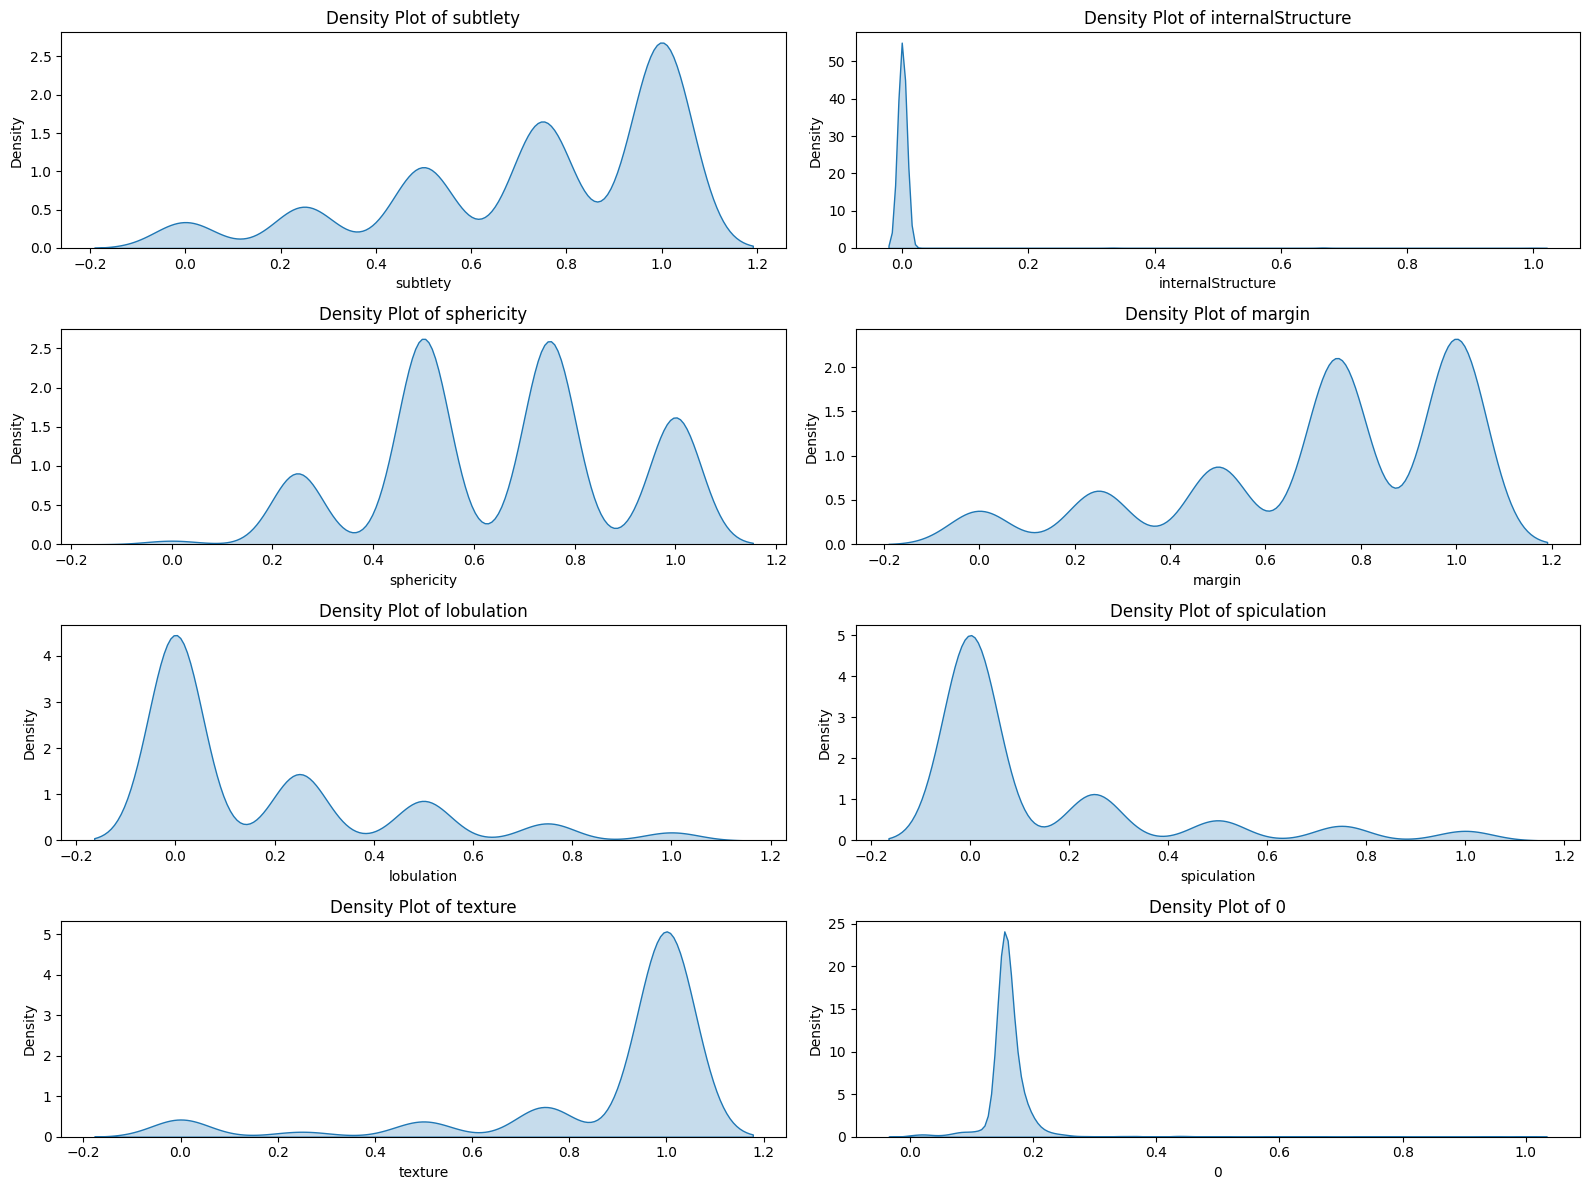

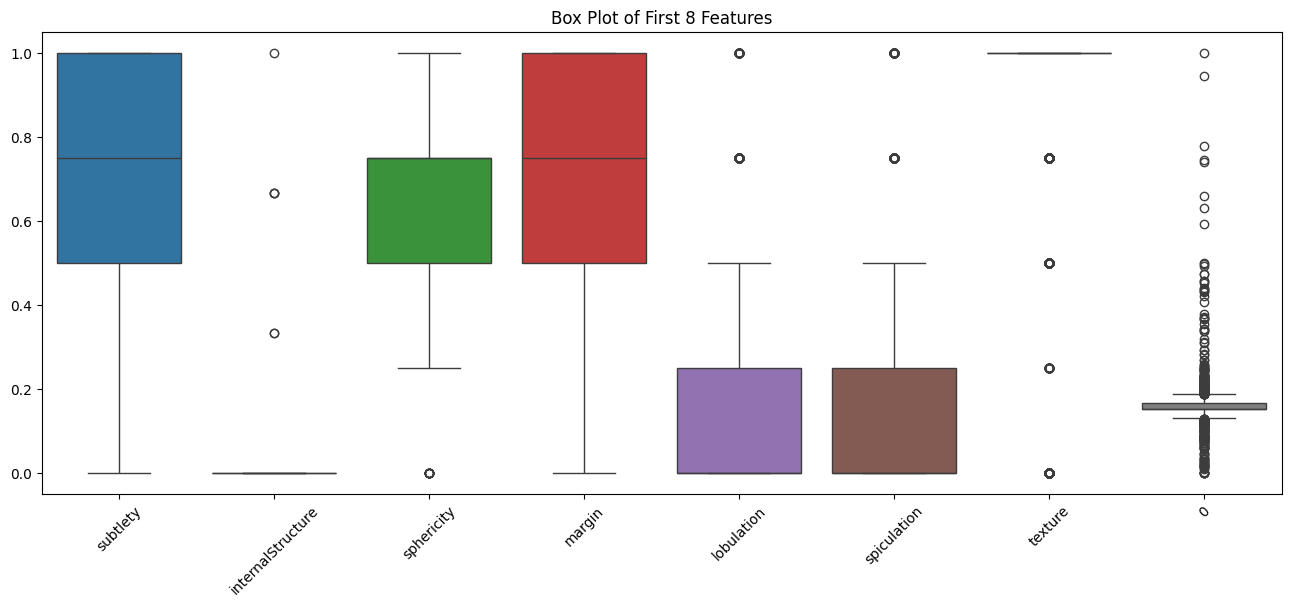

In [14]:
# Selecting the first 8 features
first_8_features = df.columns[:8]

# Set up the plot grid for density plots
plt.figure(figsize=(16, 12))
for i, col in enumerate(first_8_features, 1):
    plt.subplot(4, 2, i)  # 4 rows, 2 columns
    sns.kdeplot(df[col], shade=True)
    plt.title(f'Density Plot of {col}')
plt.tight_layout()
plt.show()

# Set up the plot grid for box plots
plt.figure(figsize=(16, 6))
sns.boxplot(data=df[first_8_features])
plt.xticks(rotation=45)
plt.title("Box Plot of First 8 Features")
plt.show()


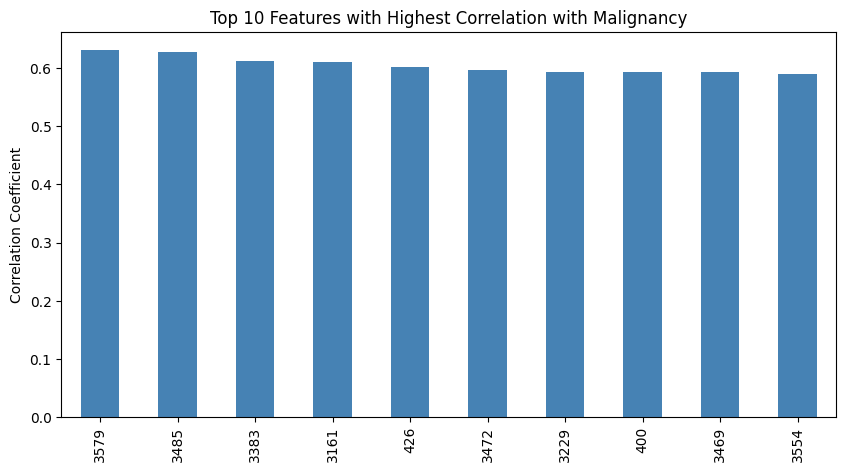

In [15]:
# Assuming 'malignancy' is the target column
target = 'malignancy'

# Calculate correlation matrix
correlation_matrix = df.corr()

# Get correlations with target column
target_correlation = correlation_matrix[target].drop(target)  # Remove target's self-correlation

# Sort by absolute correlation values to find top and bottom features
top_features = target_correlation.abs().sort_values(ascending=False).head(10).index
bottom_features = target_correlation.abs().sort_values().head(10).index

# Create a DataFrame for plotting
top_corr = target_correlation.loc[top_features]
bottom_corr = target_correlation.loc[bottom_features]

# Plot top 10 correlations
plt.figure(figsize=(10, 5))
top_corr.plot(kind='bar', color='steelblue')
plt.title('Top 10 Features with Highest Correlation with Malignancy')
plt.ylabel('Correlation Coefficient')
plt.show()

# Plot bottom 10 correlations
plt.figure(figsize=(10, 5))
bottom_corr.plot(kind='bar', color='salmon')
plt.title('Top 10 Features with Lowest Correlation with Malignancy')
plt.ylabel('Correlation Coefficient')
plt.show()


### Data Analysis and Feature Selection

In our analysis, we will employ Principal Component Analysis (PCA) for feature selection, following the methodology established by Liu, Liu, and Zhao (2018). A PCA works by transforming the original dataset into a new set of variables (principal components) that are linear combinations of the original features, thus reducing data complexity. This is a widely used technique in machine learning and is especially useful when analyzing data with many features.

In [17]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
pca_full = PCA()
pca_full.fit(X)

PCA()

Following the PCA approach used by Liu, Liu, and Zhao (2018), we retain enough components to capture 98% of the total variance. This allows us to reduce the dimensionality of the dataset significantly while still preserving most of the information.

In [18]:
explained_variance_cumulative = np.cumsum(pca_full.explained_variance_ratio_)
plt.plot(range(1, len(explained_variance_cumulative) + 1), explained_variance_cumulative)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs Number of Components')
plt.grid(True)
plt.show()

# target explained variance threshold (98%)
target_variance = 0.98

# number of components required to reach the target explained variance
num_components = np.argmax(explained_variance_cumulative >= target_variance) + 1

print(f"Number of components to reach {target_variance*100}% explained variance: {num_components}")

Number of components to reach 98.0% explained variance: 87


The plot generated showing "Cumulative Explained Variance vs. Number of Components" helps determine how many components to keep. By examining this plot, we can see where the cumulative explained variance stabilizes, indicating that adding more components beyond this point would contribute very little additional information.

In [19]:
pca = PCA(num_components)
X = pca.fit_transform(X)

According to the methodology described by Hesse, de Jong, Pluim, and Cheplygina (2020), a t-test was employed to rank features based on their significance in correlating with nodule malignancy. This approach allows for effective feature selection by identifying the most relevant features, which are determined by the p-values from the t-test. Features with lower p-values indicate a greater distinction between benign and malignant samples, making them critical for the predictive model. 

Following this methodology, we applied a t-test to our PCA-transformed data to identify and select features with a p-value less than or equal to 0.05, focusing on those showing the most significant differences between the two groups.

The t-test formula used to assess the significance of each feature is as follows:

$$
t = \frac{\bar{X}_1 - \bar{X}_2}{\sqrt{\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}}}
$$

where:

- $ \bar{X}_1 $ and $ \bar{X}_2 $ are the means of the feature for each class (benign and malignant).
- $ s_1^2 $ and $ s_2^2 $ are the variances of the feature in each class.
- $ n_1 $ and $ n_2 $ are the sample sizes for each class.

In [21]:
# Convert the result to a DataFrame
X_pca_df = pd.DataFrame(X, columns=[f'PC{i+1}' for i in range(X.shape[1])])

# Separate the samples into two groups based on labels
group1 = X_pca_df[y == 0]  # Benign group (or class 0)
group2 = X_pca_df[y == 1]  # Malignant group (or class 1)

# Apply t-test to each of the 87 principal components
p_values = []
for column in X_pca_df.columns:
    _, p_value = ttest_ind(group1[column], group2[column], equal_var=False)
    p_values.append(p_value)

# Create a DataFrame with p-values for the 87 principal components
p_values_df = pd.DataFrame({
    'Component': X_pca_df.columns,
    'p_value': p_values
})

# Filter for components with a p-value lower or equal than 0.05
selected_features_df = p_values_df[p_values_df['p_value'] <= 0.05]
selected_features = selected_features_df['Component'].tolist()

# View the selected features
print("Selected Features with p-value <= 0.05:", selected_features)
print("Number of Features:", len(selected_features_df))


Selected Features with p-value <= 0.05: ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC7', 'PC8', 'PC10', 'PC13', 'PC15', 'PC16', 'PC18', 'PC20', 'PC21', 'PC23', 'PC24', 'PC31', 'PC32', 'PC35', 'PC36', 'PC47', 'PC53', 'PC78']
Number of Features: 23


### Model Implementation

According to the literature, Convolutional Neural Networks (CNNs) are widely regarded as the most effective classification algorithm for this task. However, in our study, we aim to explore the performance of alternative classifiers, specifically Random Forest and Support Vector Machine (SVM) algorithms. Both Random Forest and SVM have demonstrated robustness and versatility across different datasets, and by experimenting with these algorithms, we hope to evaluate their effectiveness in our specific context. This comparative analysis will provide valuable insights into the strengths and weaknesses of each approach, allowing us to determine the most suitable model for our classification tasks.

Causey et al. (2018) and Shen et al. (2015) demonstrated the effectiveness of Random Forest in their classification tasks. In contrast, Liu, Liu, and Zhao (2018) utilized Support Vector Machines (SVM) to achieve their results.


### Support Vector Machine (SVM)

In [22]:
sv_classifier = SVC(C=100, gamma=1, kernel='rbf',probability=True)

#### Random Forest Classifier (RF)

In [23]:
rf_classifier = RandomForestClassifier(criterion="entropy", max_depth=30, min_samples_leaf=1, n_estimators=400)

### Hyperparameter Tuning with Grid Search

In our project, we implemented Grid Search to optimize the hyperparameters for both the Random Forest (RF) and Support Vector Machine (SVM) classifiers, following a similar approach to that of Torres (2023). This approach enabled us to systematically explore a range of parameter combinations, allowing us to identify the optimal configuration for each model.

Given the nature of our lung analysis project, where accurately identifying positive cases is crucial, we chose to prioritize sensitivity over other metrics. Sensitivity, also known as recall, measures the proportion of true positive cases that are correctly identified by the model. In the context of our project, a high sensitivity ensures that we minimize the number of false negatives, thereby reducing the likelihood of missing cases that require further investigation.

To further prioritize sensitivity, we used the Fβ score, setting β = 1.5 to emphasize recall while maintaining a balance with specificity. The Fβ score is a metric that combines precision and recall into a single value, weighted by β to give more importance to recall over precision. By choosing β = 1.5, we weighted recall 2.25 times more heavily than precision, allowing us to reduce false negatives without excessively sacrificing specificity. This approach ensured that the model could capture as many positive cases as possible while still keeping the rate of false positives reasonable. 

The F1.5 score formula is calculated as follows:

$$
F_{1.5} = (1 + 1.5^2) \cdot \frac{\text{precision} \cdot \text{recall}}{(1.5^2 \cdot \text{precision}) + \text{recall}}
$$

In [38]:
sv_classifier = SVC(probability=True, random_state=42)

# Define the hyperparameter grid to test
param_grid = {
    'C': [0.1, 1, 10, 100, 1000],            # Test different regularization values
    'kernel': ['linear', 'rbf', 'poly'],  # Test different types of kernel
    'gamma': ['scale', 'auto', 0.01, 0.1, 1, 2, 5]  # Test different values for gamma
}

# Define F_score for scoring parameter
f1_5_scorer = make_scorer(fbeta_score, beta=1.5)  # Higher beta gives more weight to recall

# Configure GridSearchCV
grid_search = GridSearchCV(estimator=sv_classifier, param_grid=param_grid, cv=10, scoring=f1_5_scorer, n_jobs=-1, verbose=2)

# Run GridSearch to find the best parameters
grid_search.fit(X, y)

# Display the best parameters and the best score
print("Best parameters:", grid_search.best_params_)
print("Best f1.5 score:", grid_search.best_score_)

Fitting 10 folds for each of 105 candidates, totalling 1050 fits
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.3s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.3s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.3s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.3s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.4s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.3s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.4s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.4s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.4s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.4s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.7s
[CV] END .....................C=0.1, gamma=s

In [39]:
# Use the base model you have already defined
rf_classifier = RandomForestClassifier(random_state=42)

# Define the hyperparameter grid to test
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500, 600],       # Number of trees in the forest
    'max_depth': [10, 20, 30, 40, None],            # Try different depths
    'min_samples_leaf': [1, 2, 3, 4],           # Minimum number of samples required to be at a leaf node
    'criterion': ['gini', 'entropy']            # Include the criterion entropy and gini
}

# Define F1.5 score for scoring parameter
f1_5_scorer = make_scorer(fbeta_score, beta=1.5)  # Higher beta gives more weight to recall

# Configure GridSearch with cross-validation (10 folds)
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=10, scoring=f1_5_scorer, n_jobs=-1, verbose=2)

# Train the GridSearch
grid_search.fit(X, y)

# Display the best parameters and the best score
print("Best parameters:", grid_search.best_params_)
print("Best f1.5 score:", grid_search.best_score_)

Fitting 10 folds for each of 240 candidates, totalling 2400 fits
[CV] END criterion=gini, max_depth=10, min_samples_leaf=1, n_estimators=100; total time=   0.8s
[CV] END criterion=gini, max_depth=10, min_samples_leaf=1, n_estimators=100; total time=   0.9s
[CV] END criterion=gini, max_depth=10, min_samples_leaf=1, n_estimators=100; total time=   0.9s
[CV] END criterion=gini, max_depth=10, min_samples_leaf=1, n_estimators=100; total time=   0.9s
[CV] END criterion=gini, max_depth=10, min_samples_leaf=1, n_estimators=100; total time=   0.9s
[CV] END criterion=gini, max_depth=10, min_samples_leaf=1, n_estimators=100; total time=   0.9s
[CV] END criterion=gini, max_depth=10, min_samples_leaf=1, n_estimators=100; total time=   0.9s
[CV] END criterion=gini, max_depth=10, min_samples_leaf=1, n_estimators=100; total time=   0.9s
[CV] END criterion=gini, max_depth=10, min_samples_leaf=1, n_estimators=100; total time=   0.9s
[CV] END criterion=gini, max_depth=10, min_samples_leaf=1, n_estimators

### Ensemble Classifier

In addition to optimizing the individual Random Forest (RF) and Support Vector Machine (SVM) models, we implemented a stacking ensemble to leverage the strengths of both classifiers. Logistic Regression was chosen due to its interpretability and effectiveness in binary classification tasks, which aligns well with our project's aim of classifying nodules as benign or malignant.

In [25]:
# Define the meta-model
meta_model = LogisticRegression()

# Create the stacking ensemble
stacking_ensemble = StackingClassifier(
    estimators=[('svm', sv_classifier), ('rf', rf_classifier)],
    final_estimator=meta_model
)

### Performance metrics

For this study, we will adopt performance metrics including Area Under the ROC Curve (AUC), accuracy (acc), sensitivity (sens), and specificity (spc), in line with the approaches of Causey et al. (2018) and Xie et al. (2018). While Torres (2023) employed the Precision, Recall and F1-score and Liu, Liu, and Zhao (2018) focused primarily on accuracy, we believe that using AUC, ACC, SENS, and SPC provides a more comprehensive evaluation of model performance. AUC offers a balanced perspective on how well a model distinguishes between classes, while ACC, SENS, and SPC together allow us to assess the model's accuracy, its ability to correctly identify true positives, and its effectiveness in minimizing false positives. This combination offers a more complete understanding of both the model's predictive power and its practical utility.

### Validation Methodology

For model validation, we will use 10-fold cross-validation, following the methodology employed by Xie et al. (2018). This approach involves dividing the dataset into 10 equal parts, training the model on 9 parts while testing on the remaining one, and repeating this process 10 times. Each fold serves as a test set once, ensuring that the model is evaluated across various data splits.

In [26]:
# Function to compute specificity
def specificity_score(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    return tn / (tn + fp)

# Function to compute sensitivity
def sensitivity_score(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    return tp / (tp + fn)

# Function to evaluate model using cross-validation
def evaluate_model(clf, X, y, cv_folds=10):
    skf = StratifiedKFold(n_splits=cv_folds, shuffle=True, random_state=42)
    
    y_pred = cross_val_predict(clf, X, y, cv=skf, method='predict')
    y_proba = cross_val_predict(clf, X, y, cv=skf, method='predict_proba')[:, 1]
    
    # Compute metrics
    acc = accuracy_score(y, y_pred)
    auc = roc_auc_score(y, y_proba)
    sens = sensitivity_score(y, y_pred)
    spc = specificity_score(y, y_pred)
    
    return acc, auc, sens, spc

In [28]:
# Evaluate Random Forest model
rf_acc, rf_auc, rf_sens, rf_spc = evaluate_model(rf_classifier, X, y)
print(f"Random Forest: Accuracy = {rf_acc:.3f}, AUC = {rf_auc:.3f}, Sensitivity = {rf_sens:.3f}, Specificity = {rf_spc:.3f}")

# Evaluate SVM model
svm_acc, svm_auc, svm_sens, svm_spc= evaluate_model(sv_classifier, X, y)
print(f"SVM: Accuracy = {svm_acc:.3f}, AUC = {svm_auc:.3f}, Sensitivity = {svm_sens:.3f}, Specificity = {svm_spc:.3f},")

# Evaluate the Ensemble model
ensemble_acc, ensemble_auc, ensemble_sens, ensemble_spc = evaluate_model(stacking_ensemble, X, y)
print(f"Ensemble (SVM + RF): Accuracy = {ensemble_acc:.3f}, AUC = {ensemble_auc:.3f}, Sensitivity = {ensemble_sens:.3f}, Specificity = {ensemble_spc:.3f}")

Random Forest: Accuracy = 0.907, AUC = 0.961, Sensitivity = 0.919, Specificity = 0.895
SVM: Accuracy = 0.900, AUC = 0.948, Sensitivity = 0.939, Specificity = 0.860,
Ensemble (SVM + RF): Accuracy = 0.912, AUC = 0.966, Sensitivity = 0.927, Specificity = 0.897


### Results

In [ ]:
# Example data for visualization
models = ['Random Forest', 'SVM', 'Stacking Ensemble']
metrics = ['Accuracy', 'AUC', 'Sensitivity', 'Specificity']

# Placeholder results
rf_results = [rf_acc, rf_auc, rf_sens, rf_spc]
svm_results = [svm_acc, svm_auc, svm_sens, svm_spc]
stacking_results = [ensemble_acc, ensemble_auc, ensemble_sens, ensemble_spc]  

# Combine results
results = np.array([rf_results, svm_results, stacking_results])

# Plot the results with improved aesthetics
fig, ax = plt.subplots(figsize=(12, 6))
bar_width = 0.25
index = np.arange(len(metrics))

# Colors for each model
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']

# Bars for each model with data labels
bars_rf = ax.bar(index, results[0], bar_width, label='Random Forest', color=colors[0])
bars_svm = ax.bar(index + bar_width, results[1], bar_width, label='SVM', color=colors[1])
bars_stacking = ax.bar(index + 2 * bar_width, results[2], bar_width, label='Stacking Ensemble', color=colors[2])

# Adding data labels on each bar
for bars in [bars_rf, bars_svm, bars_stacking]:
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, yval + 0.01, f'{yval:.3f}', ha='center', va='bottom')

# Add labels, title, and legend
ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Model Comparison - Random Forest vs SVM vs Stacking Ensemble')
ax.set_xticks(index + bar_width)
ax.set_xticklabels(metrics)
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()

### Conclusions

In conclusion, our results demonstrate a strong model performance, with a notably high AUC of 0.96, showing that our model is effective at distinguishing between classes. Additionally, the sensitivity is higher than specificity, which aligns with our use of the F1.5 score during grid search to prioritize recall. While the SVM model achieved slightly higher sensitivity, we selected the ensemble model as our final choice, as it consistently performed better overall across multiple metrics, making it the most balanced and reliable option for our classification task.

### References

- Liu, L., Liu, Y., & Zhao, H. (2018). Benign and malignant solitary pulmonary nodules classification based on CNN and SVM. *ACM International Conference Proceeding Series*.

- Xie, Y., Zhang, J., Xia, Y., Fulham, M., & Zhang, Y. (2018). Fusing texture, shape and deep model-learned information at decision level for automated classification of lung nodules on chest CT. *Information Fusion*.

- Torres, G. (2023). Prediction of Malignancy in Lung Cancer using several strategies for the fusion of Multi-Channel Pyradiomics Images. *EasyChair - PrePrint*.

- Shen, W., Zhou, M., Yang, F., Yang, C., & Tian, J. (2015). Multi-scale convolutional neural networks for lung nodule classification. In *Lecture Notes in Computer Science (including subseries Lecture Notes in Artificial Intelligence and Lecture Notes in Bioinformatics)*.

- Bak, S.H., Lee, H.Y., Lee, G., & Park, H. (2018). Radiomics in lung cancer from basic to advanced: Current status and future directions. *Korean Journal of Radiology*.

- Causey, J.L., Zhang, J., Ma, S., Jiang, B., Qualls, J.A., Politte, D.G., Prior, F., Zhang, S., & Huang, X. (2018). Highly accurate model for prediction of lung nodule malignancy with CT scans. *Scientific Reports*.

- Kumar, D., Wong, A., & Clausi, D. A. (2015). Lung nodule classification using deep features in CT images. Conference on Computer and Robot Vision, 133-138

- Dunn, B., Pierobon, M., & Wei, Q. (2023). Automated Classification of Lung Cancer Subtypes Using Deep Learning and CT-Scan Based Radiomic Analysis. Bioengineering, 10(690).

- Hesse, L.S., de Jong, P.A., Pluim, J.P.W., & Cheplygina, V. (2020). Primary Tumor Origin Classification of Lung Nodules in Spectral CT using Transfer Learning.

- S.P. Morozov, A.E. Andreychenko, N.A. Pavlov, A.V. Vladzymyrskyy, N.V. Ledikhova, V.A. Gombolevskiy, I.A. Blokhin, P.B. Gelezhe, A.V. Gonchar, V.Yu. (2020) CherninaMosMedData: Chest CT Scans with COVID-19 Related Findings Dataset.